- Nama: Alifia Mustika Sari
- Email: alifiamustika02@gmail.com
- ID Dicoding: alouvre

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# ================================
# 🔗 Mount Google Drive & Navigasi
# ================================
from google.colab import drive
import os
import shutil
import joblib  # Untuk simpan/muat model
import pickle

# ================================
# ⚙️ Konfigurasi Umum & Reproducibility
# ================================
import pandas as pd
import numpy as np
import random
import warnings

# Supress warnings dan set seed
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

seed = 0
np.random.seed(seed)
random.seed(seed)

# ================================
# 📊 Visualisasi
# ================================
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# 🧠 Machine Learning & Preprocessing
# ================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Model
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Metrik evaluasi
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Path tujuan proyek di Google Drive
target_path = '/content/drive/MyDrive/MSML/Proyek_Akhir'

# Cek apakah path ada, lalu berpindah ke direktori tersebut
if os.path.exists(target_path):
    os.chdir(target_path)
    print(f"✅ Berhasil berpindah ke direktori: {os.getcwd()}")
else:
    print(f"❌ Path tidak ditemukan: {target_path}. Periksa kembali lokasi foldernya.")

Mounted at /content/drive
✅ Berhasil berpindah ke direktori: /content/drive/MyDrive/MSML/Proyek_Akhir


In [3]:
pd.set_option('display.max_columns', None)

url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"

# Menyiapkan dataset dari GitHub Dicoding
df_student = pd.read_csv(
    url,
    sep=";",  # Specify the separator as semicolon
    encoding='utf-8-sig'  # Pakai utf-8-sig untuk menghilangkan karakter BOM
)


print("Jumlah data mahasiswa:", len(df_student.GDP))

Jumlah data mahasiswa: 4424


In [4]:
df_student

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


#### 3.1. Menyimpan Data Asli

Data mahasiswa yang digunakan dalam proyek ini diambil dari platform GitHub, yang menyediakan dataset berisi informasi akademik, sosial, ekonomi, dan demografis mahasiswa untuk keperluan analisis performa studi dan prediksi dropout.

In [5]:
os.makedirs("app/data", exist_ok=True)

df_student.to_csv("app/data/data_student.csv", index=False)

Dengan menyimpan file sebagai `data_student.csv`, dapat dipastikan bahwa data mentah (raw data) terdokumentasi dan tidak langsung diubah, sehingga bisa digunakan sebagai referensi dasar sebelum dilakukan proses `Exploratory Data Analysis (EDA)`, `pembuatan dashboard`, `preprocessing`, maupun `pelatihan model machine learning`. Langkah ini juga mendukung reproducibility dan manajemen data yang lebih baik selama siklus pengembangan proyek.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
#Type your code here

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [6]:
df_student_cleaned = df_student.copy()

### 5.1. Mengubah Nama Kolom

In [7]:
df_student_cleaned.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [8]:
new_column_names = {
    'Marital_status': 'MaritalStatus',
    'Application_mode': 'ApplicationMode',
    'Application_order': 'ApplicationOrder',
    'Course': 'Course',
    'Daytime_evening_attendance': 'DaytimeEveningAttendance',
    'Previous_qualification': 'PreviousQualification',
    'Previous_qualification_grade': 'PreviousQualificationGrade',
    'Nacionality': 'Nationality',
    'Mothers_qualification': 'MothersQualification',
    'Fathers_qualification': 'FathersQualification',
    'Mothers_occupation': 'MothersOccupation',
    'Fathers_occupation': 'FathersOccupation',
    'Admission_grade': 'AdmissionGrade',
    'Displaced': 'Displaced',
    'Educational_special_needs': 'EducationalSpecialNeeds',
    'Debtor': 'Debtor',
    'Tuition_fees_up_to_date': 'TuitionFeesUpToDate',
    'Gender': 'Gender',
    'Scholarship_holder': 'ScholarshipHolder',
    'Age_at_enrollment': 'AgeAtEnrollment',
    'International': 'International',
    'Curricular_units_1st_sem_credited': 'CurricularUnits1stSemCredited',
    'Curricular_units_1st_sem_enrolled': 'CurricularUnits1stSemEnrolled',
    'Curricular_units_1st_sem_evaluations': 'CurricularUnits1stSemEvaluations',
    'Curricular_units_1st_sem_approved': 'CurricularUnits1stSemApproved',
    'Curricular_units_1st_sem_grade': 'CurricularUnits1stSemGrade',
    'Curricular_units_1st_sem_without_evaluations': 'CurricularUnits1stSemWithoutEvaluations',
    'Curricular_units_2nd_sem_credited': 'CurricularUnits2ndSemCredited',
    'Curricular_units_2nd_sem_enrolled': 'CurricularUnits2ndSemEnrolled',
    'Curricular_units_2nd_sem_evaluations': 'CurricularUnits2ndSemEvaluations',
    'Curricular_units_2nd_sem_approved': 'CurricularUnits2ndSemApproved',
    'Curricular_units_2nd_sem_grade': 'CurricularUnits2ndSemGrade',
    'Curricular_units_2nd_sem_without_evaluations': 'CurricularUnits2ndSemWithoutEvaluations',
    'Unemployment_rate': 'UnemploymentRate',
    'Inflation_rate': 'InflationRate',
    'GDP': 'GDP',
    'Target': 'Target'
}

df_student_cleaned = df_student_cleaned.rename(columns=new_column_names)
df_student_cleaned.columns

Index(['MaritalStatus', 'ApplicationMode', 'ApplicationOrder', 'Course',
       'DaytimeEveningAttendance', 'PreviousQualification',
       'PreviousQualificationGrade', 'Nationality', 'MothersQualification',
       'FathersQualification', 'MothersOccupation', 'FathersOccupation',
       'AdmissionGrade', 'Displaced', 'EducationalSpecialNeeds', 'Debtor',
       'TuitionFeesUpToDate', 'Gender', 'ScholarshipHolder', 'AgeAtEnrollment',
       'International', 'CurricularUnits1stSemCredited',
       'CurricularUnits1stSemEnrolled', 'CurricularUnits1stSemEvaluations',
       'CurricularUnits1stSemApproved', 'CurricularUnits1stSemGrade',
       'CurricularUnits1stSemWithoutEvaluations',
       'CurricularUnits2ndSemCredited', 'CurricularUnits2ndSemEnrolled',
       'CurricularUnits2ndSemEvaluations', 'CurricularUnits2ndSemApproved',
       'CurricularUnits2ndSemGrade', 'CurricularUnits2ndSemWithoutEvaluations',
       'UnemploymentRate', 'InflationRate', 'GDP', 'Status'],
      dtype='object

### 5.2. Mengubah Tipe Data

In [9]:
categorical_columns = [
    'MaritalStatus',
    'ApplicationMode',
    'Course',
    'DaytimeEveningAttendance',
    'PreviousQualification',
    'Nationality',
    'MothersQualification',
    'FathersQualification',
    'MothersOccupation',
    'FathersOccupation',
    'Displaced',
    'EducationalSpecialNeeds',
    'Debtor',
    'TuitionFeesUpToDate',
    'Gender',
    'ScholarshipHolder',
    'International',
    'Status'
]

numerical_columns = ['ApplicationOrder', 'PreviousQualificationGrade', 'AdmissionGrade',
                     'AgeAtEnrollment', 'CurricularUnits1stSemCredited',
                     'CurricularUnits1stSemEnrolled', 'CurricularUnits1stSemEvaluations',
                     'CurricularUnits1stSemApproved', 'CurricularUnits1stSemGrade',
                     'CurricularUnits1stSemWithoutEvaluations',
                     'CurricularUnits2ndSemCredited', 'CurricularUnits2ndSemEnrolled',
                     'CurricularUnits2ndSemEvaluations', 'CurricularUnits2ndSemApproved',
                     'CurricularUnits2ndSemGrade', 'CurricularUnits2ndSemWithoutEvaluations',
                     'UnemploymentRate', 'InflationRate', 'GDP'
]

# Ubah tipe data menjadi kategorikal
df_student_cleaned[categorical_columns] = df_student_cleaned[categorical_columns].astype('category')
# Ubah tipe data menjadi numerikal
df_student_cleaned[numerical_columns] = df_student_cleaned[numerical_columns].astype('int')

In [10]:
df_student_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   MaritalStatus                            4424 non-null   category
 1   ApplicationMode                          4424 non-null   category
 2   ApplicationOrder                         4424 non-null   int64   
 3   Course                                   4424 non-null   category
 4   DaytimeEveningAttendance                 4424 non-null   category
 5   PreviousQualification                    4424 non-null   category
 6   PreviousQualificationGrade               4424 non-null   int64   
 7   Nationality                              4424 non-null   category
 8   MothersQualification                     4424 non-null   category
 9   FathersQualification                     4424 non-null   category
 10  MothersOccupation                   

In [11]:
df_student_cleaned.select_dtypes(include=['int']).columns

Index(['ApplicationOrder', 'PreviousQualificationGrade', 'AdmissionGrade',
       'AgeAtEnrollment', 'CurricularUnits1stSemCredited',
       'CurricularUnits1stSemEnrolled', 'CurricularUnits1stSemEvaluations',
       'CurricularUnits1stSemApproved', 'CurricularUnits1stSemGrade',
       'CurricularUnits1stSemWithoutEvaluations',
       'CurricularUnits2ndSemCredited', 'CurricularUnits2ndSemEnrolled',
       'CurricularUnits2ndSemEvaluations', 'CurricularUnits2ndSemApproved',
       'CurricularUnits2ndSemGrade', 'CurricularUnits2ndSemWithoutEvaluations',
       'UnemploymentRate', 'InflationRate', 'GDP'],
      dtype='object')

In [12]:
df_student_cleaned.select_dtypes(include=['category']).columns

Index(['MaritalStatus', 'ApplicationMode', 'Course',
       'DaytimeEveningAttendance', 'PreviousQualification', 'Nationality',
       'MothersQualification', 'FathersQualification', 'MothersOccupation',
       'FathersOccupation', 'Displaced', 'EducationalSpecialNeeds', 'Debtor',
       'TuitionFeesUpToDate', 'Gender', 'ScholarshipHolder', 'International',
       'Status'],
      dtype='object')

### 5.3. Memfilter 2 Kelas Status - Dropout & Graduate (Tidak Dropout)

In [13]:
# Hapus baris dengan status 'Enrolled' (kelas ke-3 yang tidak digunakan)
df_student_cleaned = df_student_cleaned[df_student_cleaned['Status'] != 'Enrolled']

print(np.unique(df_student_cleaned['Status']))

['Dropout' 'Graduate']


In [14]:
df_student_cleaned['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,0


⚠️ Penyebab Utama
Label 'Enrolled' masih terdeteksi karena kolom Status bertipe data kategori (category dtype) dan nilai 'Enrolled' masih tersimpan di kategori, meskipun barisnya sudah dihapus.

Cek sendiri dengan:

In [15]:
print(df_student_cleaned['Status'].dtype)

category


Kalau hasilnya category, maka itulah alasannya.

✅ Solusi: Hapus kategori yang tidak lagi digunakan
Gunakan .cat.remove_unused_categories() untuk membersihkan nilai 'Enrolled' dari metadata kolom kategori:

In [16]:
df_student_cleaned['Status'] = df_student_cleaned['Status'].cat.remove_unused_categories()

df_student_cleaned['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421


### 5.4. Encoding Data Kategorikal

In [17]:
df_student_encoded = df_student_cleaned.copy()

In [18]:
df_student_encoded.select_dtypes(include=['category']).columns

Index(['MaritalStatus', 'ApplicationMode', 'Course',
       'DaytimeEveningAttendance', 'PreviousQualification', 'Nationality',
       'MothersQualification', 'FathersQualification', 'MothersOccupation',
       'FathersOccupation', 'Displaced', 'EducationalSpecialNeeds', 'Debtor',
       'TuitionFeesUpToDate', 'Gender', 'ScholarshipHolder', 'International',
       'Status'],
      dtype='object')

In [19]:
# List kolom kategorikal yang perlu di-encode
categorical_columns = ['MaritalStatus', 'ApplicationMode', 'Course', 'DaytimeEveningAttendance', 'PreviousQualification', 'Nationality',
                       'MothersQualification', 'FathersQualification', 'MothersOccupation', 'FathersOccupation', 'Displaced',
                       'EducationalSpecialNeeds', 'Debtor', 'TuitionFeesUpToDate', 'Gender', 'ScholarshipHolder', 'International', 'Status']
encoders = {}

for col in categorical_columns:
    # Buat instance LabelEncoder
    le = LabelEncoder()
    # Encode kolom kategorikal
    df_student_encoded[col] = le.fit_transform(df_student_encoded[col])
    encoders[col] = le

joblib.dump(encoders, 'app/models/label_encoders.pkl')  # ✅ simpan sebagai dict

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
print(df_student_encoded[['MaritalStatus', 'ApplicationMode', 'Course', 'DaytimeEveningAttendance', 'PreviousQualification', 'Nationality',
                       'MothersQualification', 'FathersQualification', 'MothersOccupation', 'FathersOccupation', 'Displaced',
                       'EducationalSpecialNeeds', 'Debtor', 'TuitionFeesUpToDate', 'Gender', 'ScholarshipHolder', 'International', 'Status']])

      MaritalStatus  ApplicationMode  Course  DaytimeEveningAttendance  \
0                 0                7       1                         1   
1                 0                5      10                         1   
2                 0                0       4                         1   
3                 0                7      14                         1   
4                 1               11       2                         0   
...             ...              ...     ...                       ...   
4419              0                0      14                         1   
4420              0                0      14                         1   
4421              0                0      11                         1   
4422              0                0       8                         1   
4423              0                4      14                         1   

      PreviousQualification  Nationality  MothersQualification  \
0                         0            0     

In [20]:
df_student_encoded['Status'].value_counts()

,count
Status,
1,2209
0,1421


### 5.5. Menentukan Fitur dan Target

In [21]:
df_student_encoded.columns

Index(['MaritalStatus', 'ApplicationMode', 'ApplicationOrder', 'Course',
       'DaytimeEveningAttendance', 'PreviousQualification',
       'PreviousQualificationGrade', 'Nationality', 'MothersQualification',
       'FathersQualification', 'MothersOccupation', 'FathersOccupation',
       'AdmissionGrade', 'Displaced', 'EducationalSpecialNeeds', 'Debtor',
       'TuitionFeesUpToDate', 'Gender', 'ScholarshipHolder', 'AgeAtEnrollment',
       'International', 'CurricularUnits1stSemCredited',
       'CurricularUnits1stSemEnrolled', 'CurricularUnits1stSemEvaluations',
       'CurricularUnits1stSemApproved', 'CurricularUnits1stSemGrade',
       'CurricularUnits1stSemWithoutEvaluations',
       'CurricularUnits2ndSemCredited', 'CurricularUnits2ndSemEnrolled',
       'CurricularUnits2ndSemEvaluations', 'CurricularUnits2ndSemApproved',
       'CurricularUnits2ndSemGrade', 'CurricularUnits2ndSemWithoutEvaluations',
       'UnemploymentRate', 'InflationRate', 'GDP', 'Status'],
      dtype='object

In [22]:
selected_features = ['MothersQualification', 'FathersQualification',
                     'MothersOccupation', 'FathersOccupation',
                     'CurricularUnits1stSemCredited', 'CurricularUnits1stSemEnrolled',
                     'CurricularUnits1stSemEvaluations', 'CurricularUnits1stSemApproved',
                     'CurricularUnits1stSemGrade', 'CurricularUnits2ndSemCredited',
                     'CurricularUnits2ndSemEnrolled', 'CurricularUnits2ndSemEvaluations',
                     'CurricularUnits2ndSemApproved', 'CurricularUnits2ndSemGrade']

# Gunakan hanya fitur yang dipilih
X = df_student_encoded[selected_features]

# Pisahkan target
y = df_student_encoded['Status']

### 5.6. Splitting Data

In [23]:
# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print("Training set shape:")
print(f"X_train={X_train.shape}")
print(f"y_train={y_train.shape} \n")
print("Test set shape:")
print(f"X_train={X_test.shape}")
print(f"y_train={y_test.shape}")

Training set shape:
X_train=(2722, 14)
y_train=(2722,) 

Test set shape:
X_train=(908, 14)
y_train=(908,)


In [24]:
print(f'Jumlah total data:: {len(X)}')
print(f'Jumlah data latih: {len(X_train)}')
print(f'Jumlah data test: {len(X_test)}')

Jumlah total data:: 3630
Jumlah data latih: 2722
Jumlah data test: 908


In [25]:
print(y_train.value_counts())

Status
1    1656
0    1066
Name: count, dtype: int64


In [26]:
print(np.unique(y_train))
print(y_train.shape, X_train.shape)

[0 1]
(2722,) (2722, 14)


### 5.7. Normalisasi Fitur Numerik

In [27]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **6. Model Development**

In [28]:
def evaluate_model(y_true, y_pred, model_name="Model", train_accuracy=None, target_names=None):
    """
    Menampilkan evaluasi lengkap: Confusion Matrix, classification report, dan metrik evaluasi.

    Parameters:
    - y_true: array-like, label sebenarnya
    - y_pred: array-like, label hasil prediksi
    - model_name: str, nama model (default: "Model")
    - train_accuracy: float, akurasi pada data latih (opsional)
    - target_names: list of str, nama label untuk classification report
    """
    # Metode evaluasi
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    print(f"🛑 EVALUASI MODEL {model_name.upper()}")
    print("=" * 60)
    print(f"Accuracy : {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall   : {recall:.2f}")
    print(f"F1 Score : {f1:.2f}\n")

    print(f"🛑 CLASSIFICATION REPORT")
    print("=" * 60)
    print(classification_report(y_true, y_pred, target_names=target_names))
    print("=" * 60)
    if train_accuracy is not None:
        print(f"*{model_name.upper()} - Akurasi pada data latih: {train_accuracy:.4f}")
    print(f"*{model_name.upper()} - Akurasi pada data uji: {accuracy:.4f}")
    print("=" * 60)
    print("\n")
    print("Visualisasi:")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(6, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(ax=ax, cmap='Blues', colorbar=True)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.tight_layout()
    plt.show()

### Modeling & Evaluation

In [29]:
# Inisialisasi semua model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_rf = RandomForestClassifier(random_state=42)
model_logreg = LogisticRegression(max_iter=1000, random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)
model_svc = SVC(probability=True, random_state=42)

# Melatih semua model (pastikan X_train dan y_train sudah siap)
model_xgb.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_logreg.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_svc.fit(X_train, y_train)

print("Model training selesai.")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:54:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model training selesai.


#### Evaluasi Model XGBClassifier

🛑 EVALUASI MODEL XGBCLASSIFIER
Accuracy : 0.90
Precision: 0.90
Recall   : 0.90
F1 Score : 0.89

🛑 CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Dropout       0.90      0.82      0.86       355
    Graduate       0.89      0.94      0.92       553

    accuracy                           0.90       908
   macro avg       0.90      0.88      0.89       908
weighted avg       0.90      0.90      0.89       908

*XGBCLASSIFIER - Akurasi pada data latih: 0.9835
*XGBCLASSIFIER - Akurasi pada data uji: 0.8954


Visualisasi:


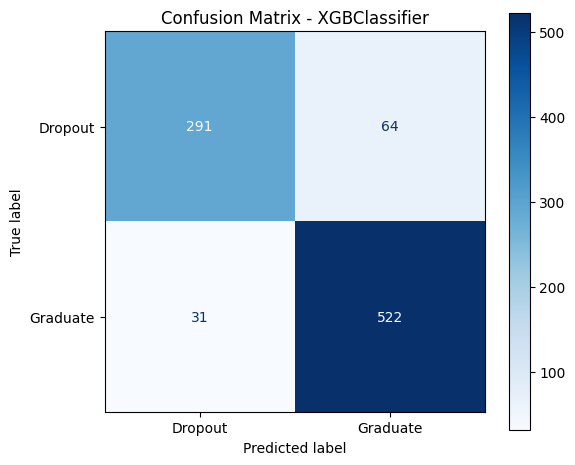

In [30]:
y_pred_xgb = model_xgb.predict(X_test)

evaluate_model(
    y_true=y_test,
    y_pred=y_pred_xgb,
    model_name="XGBClassifier",
    train_accuracy=model_xgb.score(X_train, y_train),
    target_names=['Dropout', 'Graduate']
)

#### Evaluasi Model RandomForestClassifier

🛑 EVALUASI MODEL RANDOMFORESTCLASSIFIER
Accuracy : 0.89
Precision: 0.89
Recall   : 0.89
F1 Score : 0.89

🛑 CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Dropout       0.91      0.80      0.85       355
    Graduate       0.88      0.95      0.91       553

    accuracy                           0.89       908
   macro avg       0.89      0.87      0.88       908
weighted avg       0.89      0.89      0.89       908

*RANDOMFORESTCLASSIFIER - Akurasi pada data latih: 0.9963
*RANDOMFORESTCLASSIFIER - Akurasi pada data uji: 0.8888


Visualisasi:


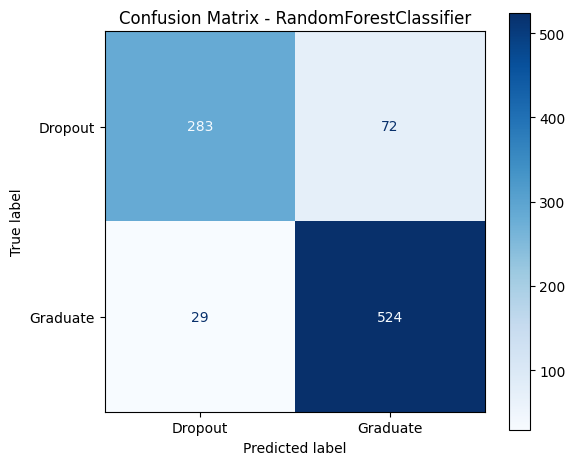

In [31]:
y_pred_rf = model_rf.predict(X_test)

evaluate_model(
    y_true=y_test,
    y_pred=y_pred_rf,
    model_name="RandomForestClassifier",
    train_accuracy=model_rf.score(X_train, y_train),
    target_names=['Dropout', 'Graduate']
)

#### Evaluasi Model LogisticRegression

🛑 EVALUASI MODEL LOGISTICREGRESSION
Accuracy : 0.87
Precision: 0.87
Recall   : 0.87
F1 Score : 0.87

🛑 CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Dropout       0.90      0.75      0.82       355
    Graduate       0.86      0.95      0.90       553

    accuracy                           0.87       908
   macro avg       0.88      0.85      0.86       908
weighted avg       0.87      0.87      0.87       908

*LOGISTICREGRESSION - Akurasi pada data latih: 0.8832
*LOGISTICREGRESSION - Akurasi pada data uji: 0.8711


Visualisasi:


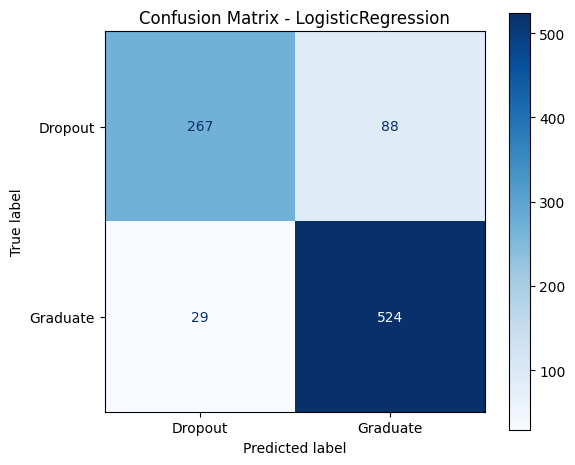

In [32]:
y_pred_logreg = model_logreg.predict(X_test)

evaluate_model(
    y_true=y_test,
    y_pred=y_pred_logreg,
    model_name="LogisticRegression",
    train_accuracy=model_logreg.score(X_train, y_train),
    target_names=['Dropout', 'Graduate']
)

#### Evaluasi Model DecisionTreeClassifier

🛑 EVALUASI MODEL DECISIONTREECLASSIFIER
Accuracy : 0.84
Precision: 0.84
Recall   : 0.84
F1 Score : 0.84

🛑 CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Dropout       0.80      0.79      0.79       355
    Graduate       0.86      0.87      0.87       553

    accuracy                           0.84       908
   macro avg       0.83      0.83      0.83       908
weighted avg       0.84      0.84      0.84       908

*DECISIONTREECLASSIFIER - Akurasi pada data latih: 0.9963
*DECISIONTREECLASSIFIER - Akurasi pada data uji: 0.8381


Visualisasi:


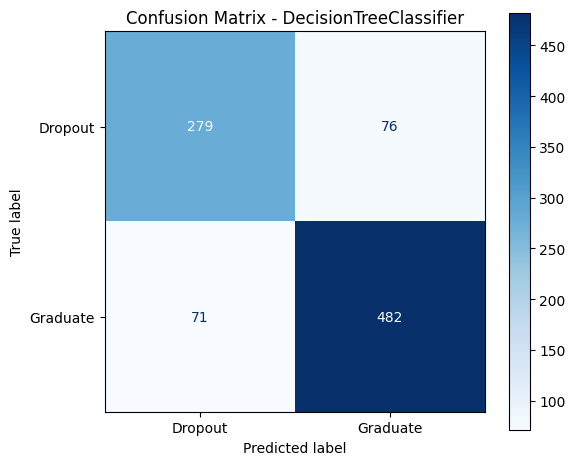

In [33]:
y_pred_dt = model_dt.predict(X_test)

evaluate_model(
    y_true=y_test,
    y_pred=y_pred_dt,
    model_name="DecisionTreeClassifier",
    train_accuracy=model_dt.score(X_train, y_train),
    target_names=['Dropout', 'Graduate']
)

#### Evaluasi Model SVC

🛑 EVALUASI MODEL SVC
Accuracy : 0.89
Precision: 0.89
Recall   : 0.89
F1 Score : 0.88

🛑 CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Dropout       0.91      0.79      0.84       355
    Graduate       0.87      0.95      0.91       553

    accuracy                           0.89       908
   macro avg       0.89      0.87      0.88       908
weighted avg       0.89      0.89      0.88       908

*SVC - Akurasi pada data latih: 0.8927
*SVC - Akurasi pada data uji: 0.8855


Visualisasi:


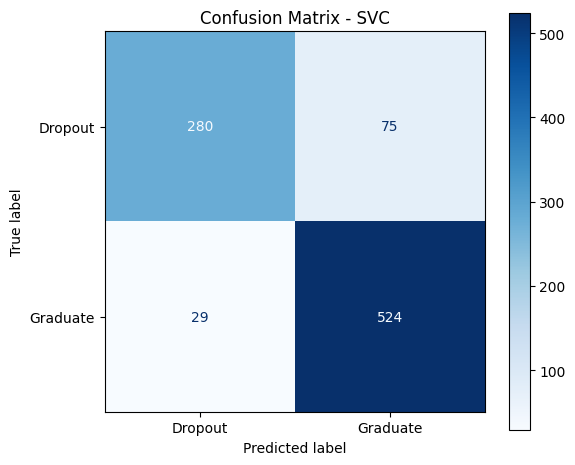

In [34]:
y_pred_svc = model_svc.predict(X_test)

evaluate_model(
    y_true=y_test,
    y_pred=y_pred_svc,
    model_name="SVC",
    train_accuracy=model_svc.score(X_train, y_train),
    target_names=['Dropout', 'Graduate']
)

#### Perbandingan Akurasi Tiap Model

In [35]:
# Fungsi untuk mengevaluasi model dan mengembalikan metrik dalam bentuk dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }

# Evaluasi semua model (pastikan semua sudah dilatih sebelumnya)
results = {
    'XGBoost Classifier': evaluate_model(model_xgb, X_test, y_test),
    'Random Forest': evaluate_model(model_rf, X_test, y_test),
    'Logistic Regression': evaluate_model(model_logreg, X_test, y_test),
    'Decision Tree': evaluate_model(model_dt, X_test, y_test),
    'Support Vector Machine': evaluate_model(model_svc, X_test, y_test),
}

# Konversi hasil ke DataFrame
summary_df = pd.DataFrame([
    {
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    }
    for model_name, metrics in results.items()
])

# Tampilkan ringkasan
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,XGBoost Classifier,0.895374,0.895845,0.895374,0.894340
1,Random Forest,0.888767,0.890086,0.888767,0.887262
2,Logistic Regression,0.871145,0.874123,0.871145,0.868569
3,Decision Tree,0.838106,0.837739,0.838106,0.837896
4,Support Vector Machine,0.885463,0.887051,0.885463,0.883782


### Konversi Model

In [36]:
# Pastikan folder penyimpanan ada
os.makedirs("app/models", exist_ok=True)

# Simpan menggunakan Pickle
with open('app/models/model_xgb.pkl', 'wb') as f:       # Simpan model XGBoost
    pickle.dump(model_xgb, f)
with open('app/models/model_rf.pkl', 'wb') as f:        # Simpan model Random Forest
    pickle.dump(model_rf, f)
with open('app/models/model_logreg.pkl', 'wb') as f:    # Simpan model Logistic Regression
    pickle.dump(model_logreg, f)
with open('app/models/model_dt.pkl', 'wb') as f:        # Simpan model Decision Tree
    pickle.dump(model_dt, f)
with open('app/models/model_svc.pkl', 'wb') as f:       # Simpan model SVC
    pickle.dump(model_svc, f)

# Simpan menggunakan Joblib (lebih cepat untuk model besar)
joblib.dump(model_xgb, 'app/models/model_xgb.joblib')
joblib.dump(model_rf, 'app/models/model_rf.joblib')
joblib.dump(model_logreg, 'app/models/model_logreg.joblib')
joblib.dump(model_dt, 'app/models/model_dt.joblib')
joblib.dump(model_svc, 'app/models/model_svc.joblib')

# Simpan Scaler untuk preprocessing prediksi
joblib.dump(scaler, 'app/models/scaler.pkl')

print("✅ Semua model dan scaler berhasil disimpan di folder 'app/models/'")

✅ Semua model dan scaler berhasil disimpan di folder 'app/models/'


In [37]:
!pip freeze > app/requirements.txt

## Menjalankan Tracking Runs (MLflow Tracking)

In [38]:
# Pastikan MLflow terinstal
%pip install mlflow requests --quiet

import os
import sys

# Cegah error akibat file lokal bernama 'mlflow.py'
need_restart = False
if os.path.exists("mlflow.py"):
    os.rename("mlflow.py", "mlflow_shadow.py")
    need_restart = True
if os.path.exists("mlflow.pyc"):
    os.remove("mlflow.pyc")
    need_restart = True

if need_restart:
    print("A file named 'mlflow.py' or 'mlflow.pyc' was found and renamed/removed.")
    print("Please RESTART the kernel and rerun this cell to avoid import errors.")
    sys.exit()

# Import MLflow dan metrik evaluasi
import mlflow
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Atur nama eksperimen (akan otomatis dibuat jika belum ada)
mlflow.set_experiment("Dropout_Prediction_Models")

# Jalankan eksperimen dan log metrik dari semua model
with mlflow.start_run():
    for model_name, model in zip(
        ['XGBoost', 'Random Forest', 'Logistic Regression', 'Decision Tree', 'SVC'],
        [model_xgb, model_rf, model_logreg, model_dt, model_svc]
    ):
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        mlflow.log_metric(f"{model_name}_accuracy", acc)
        mlflow.log_metric(f"{model_name}_precision", prec)
        mlflow.log_metric(f"{model_name}_recall", rec)
        mlflow.log_metric(f"{model_name}_f1", f1)

        print(f"✅ Logged metrics for {model_name}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 19.5 MB/s eta 0:00:00
✅ Logged metrics for XGBoost
✅ Logged metrics for Random Forest
✅ Logged metrics for Logistic Regression
✅ Logged metrics

In [41]:
# Install dependencies
!pip install mlflow pyngrok --quiet

from pyngrok import ngrok

# Masukkan authtoken secara aman
from getpass import getpass
authtoken = getpass("Masukkan ngrok authtoken kamu (akan disembunyikan):")

# Tambahkan authtoken ke ngrok config
!ngrok config add-authtoken {authtoken}

# Jalankan MLflow UI di background
os.system("mlflow ui --port 5000 &")

# Buat tunnel ngrok ke port 5000
from pyngrok import ngrok
mlflow_url = ngrok.connect(5000, "http")
print(f"🔗 MLflow UI dapat diakses di: {mlflow_url}")

Masukkan ngrok authtoken kamu (akan disembunyikan):··········
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
🔗 MLflow UI dapat diakses di: NgrokTunnel: "https://c0b3-34-13-157-145.ngrok-free.app" -> "http://localhost:5000"


In [42]:
# ✅ Contoh tracking satu model sederhana
import mlflow

# Training & Logging
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Example_Colab_Experiment")

# Mulai run MLflow
with mlflow.start_run():
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    mlflow.log_param("model", "XGBClassifier")
    mlflow.log_metric("accuracy", acc)

    print("✅ Model trained and logged to MLflow")

2025/06/18 06:58:11 INFO mlflow.tracking.fluent: Experiment with name 'Example_Colab_Experiment' does not exist. Creating a new experiment.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:58:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Model trained and logged to MLflow
🏃 View run invincible-snake-593 at: http://127.0.0.1:5000/#/experiments/782258487970721457/runs/19fad7fddaf1429ca3a36bba900f84fe
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/782258487970721457
